# Monte Carlo Simulation of S&P 500 Investment Returns

## Executive Summary
This notebook implements a Monte Carlo simulation to model potential future investment returns for the S&P 500 index. Using historical daily returns spanning over 200 years (1789-2025), we simulate thousands of possible future investment paths to assess risk and return characteristics for portfolio planning.

## Methodology Overview
**Monte Carlo Simulation** is a computational technique that uses random sampling to model the probability distribution of outcomes. In finance, it's particularly valuable for:

### Key Applications:
- **Risk Assessment**: Understanding the range of possible investment outcomes
- **Portfolio Planning**: Estimating probability of achieving investment goals
- **Stress Testing**: Analyzing worst-case scenarios for risk management
- **Option Pricing**: Valuing complex financial derivatives

### Simulation Process:
1. **Historical Bootstrap**: Randomly sample from historical daily returns with replacement
2. **Path Generation**: Create multiple possible future price paths
3. **Statistical Analysis**: Analyze distribution of final outcomes
4. **Risk Metrics**: Calculate Value-at-Risk (VaR) and Conditional VaR (CVaR)

## Key Assumptions
- **Historical Representativeness**: Past returns are representative of future market behavior
- **Independence**: Daily returns are independent (no serial correlation)
- **Stationarity**: Market statistics remain constant over time
- **No Transaction Costs**: Ignores trading fees, taxes, and market impact

## Expected Insights
- **Return Distribution**: Bell-curve-like distribution of final portfolio values
- **Risk Quantification**: Probability of losses and extreme outcomes
- **Investment Horizon Impact**: How time affects risk and return characteristics
- **Goal Achievement**: Likelihood of reaching specific return targets

---
*This analysis is for educational purposes and should not be considered investment advice. All investments carry risk.*

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Fix the path construction - use forward slashes or raw strings
import os

# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "04_S&P500_quant_analysis", "01_data", "S&P500_D_1789-05-01_2025-09-17.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "S&P500_D_1789-05-01_2025-09-17.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "S&P500_D_1789-05-01_2025-09-17.csv"

# print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path)

# lower case column names for easier access
df.columns = [col.lower() for col in df.columns]

# Set the 'date' column as the index and convert it to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Show the first few rows of the dataframe
df.head()

,open,high,low,close,volume
date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,0.0
1789-06-01,0.51,0.51,0.51,0.51,0.0
1789-07-01,0.50,0.50,0.50,0.50,0.0
1789-08-01,0.50,0.51,0.50,0.51,0.0
1789-09-01,0.51,0.51,0.50,0.51,0.0


In [15]:
# Calculate simple returns with pct_change()
df['simple_returns'] = df['close'].pct_change()

# Drop NA values that result from pct_change()
df.dropna(inplace=True)

# Show dataframe
df.head()

,open,high,low,close,volume,simple_returns
date,,,,,,
1789-06-01,0.51,0.51,0.51,0.51,0.0,0.000000
1789-07-01,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-01,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-01,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-01,0.51,0.51,0.51,0.51,0.0,0.000000


In [16]:
# drop 'open', 'high', 'low', 'close', 'volume' columns
df = df.drop(columns=['open', 'high', 'low', 'close', 'volume'])

# rename 'simple_returns' to 'returns'
df.rename(columns={'simple_returns': 'returns'}, inplace=True)

daily_returns = df.copy()

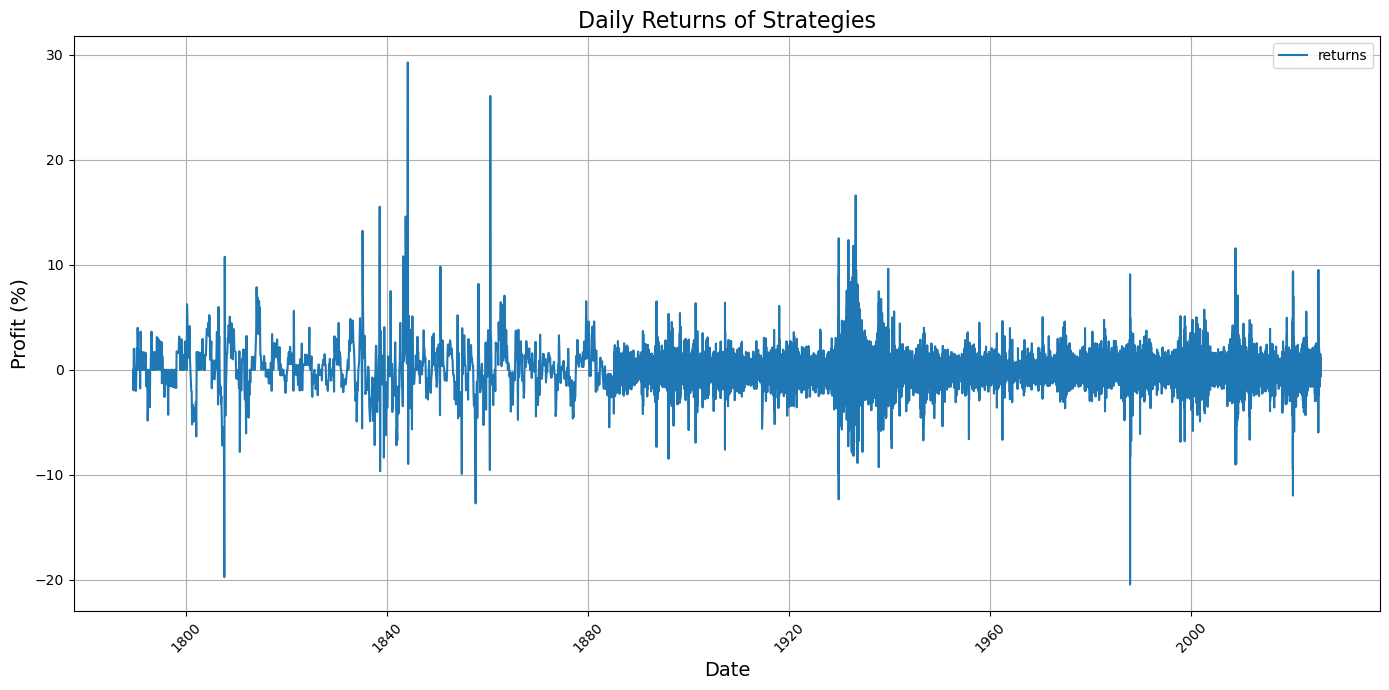

In [17]:
# plot daily_returns
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_returns*100, color='blue', linewidth=1.5)
plt.title('Daily Returns of Strategies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Profit (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Monte Carlo Simulation

# Simulation parameters
num_simulations = 1000  # Number of simulations
forecast_days = 365  # Investment horizon in days
desired_return = 0.10  # Desired return (10%)
initial_investment = 100000  # Initial investment amount

# Extract the returns values as a 1D array
returns_array = daily_returns['returns'].values

# Initialize the simulation array with zeros
simulations = np.zeros((num_simulations, forecast_days))

# Simulate future paths
for i in range(num_simulations):
    # Sample daily returns randomly with replacement
    random_returns = np.random.choice(returns_array, size=forecast_days, replace=True)
    # Calculate cumulative returns
    cumulative_returns = random_returns.cumsum()
    # Calculate portfolio value over time
    simulations[i, :] = initial_investment * (1 + cumulative_returns)

print(f"Simulation shape: {simulations.shape}")
print(f"Sample simulation results (first 5 days of first simulation):")
print(simulations[0, :5])

Simulation shape: (1000, 365)
Sample simulation results (first 5 days of first simulation):
[101081.29755707 100914.6308904  101006.79678902  99986.38862575
  99986.38862575]


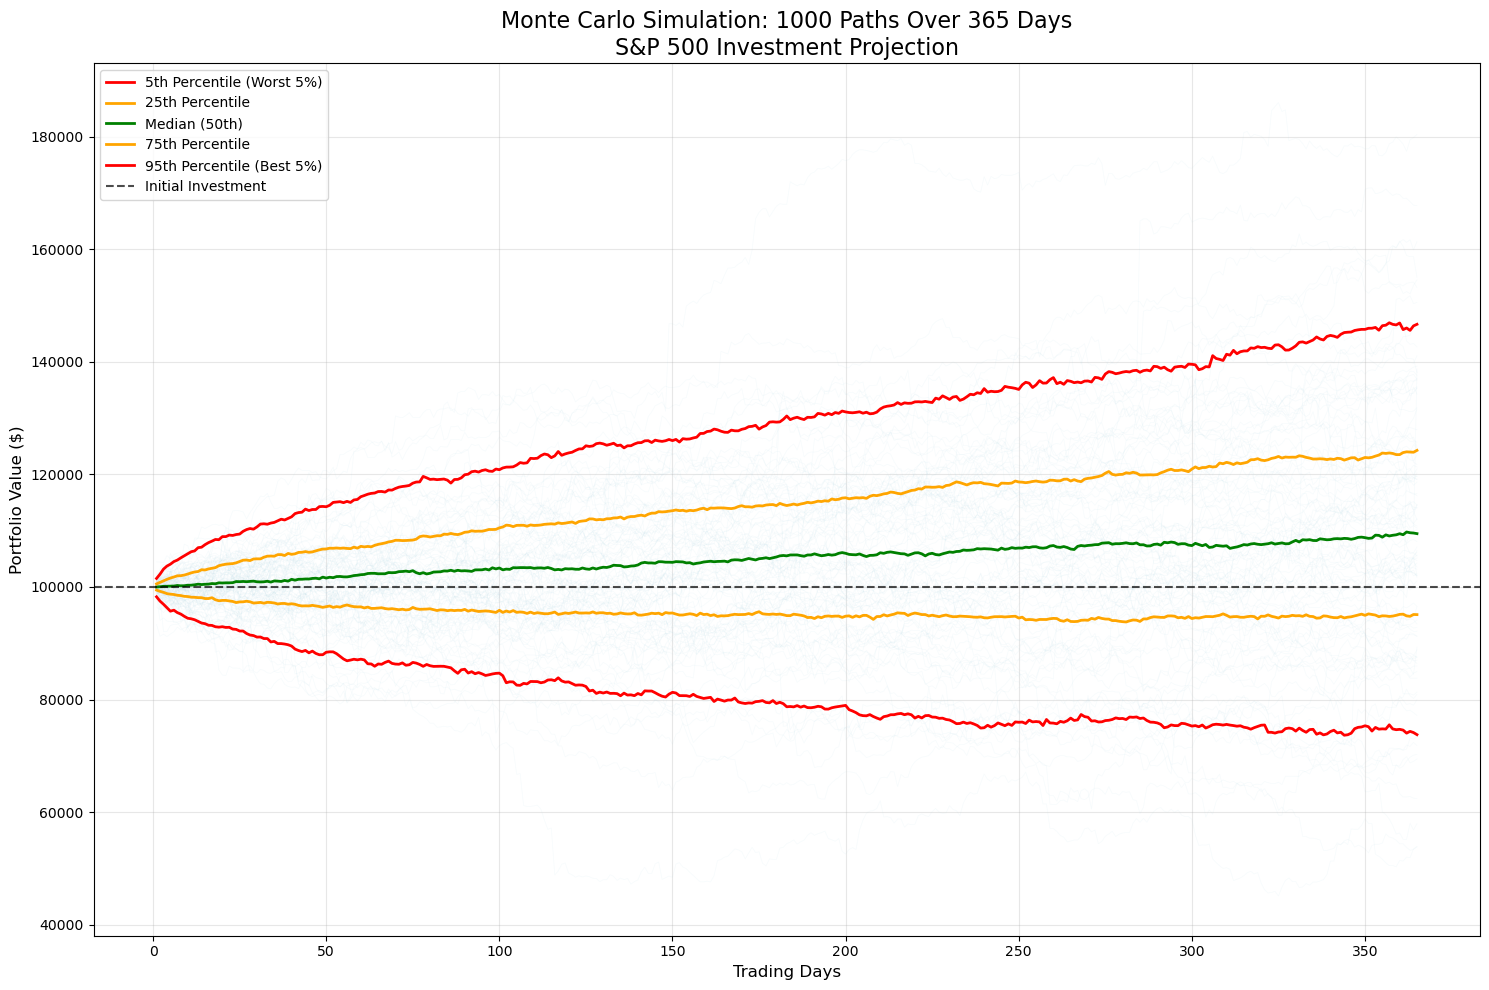

=== MONTE CARLO SIMULATION RESULTS ===
Initial Investment: $100,000.00
Investment Horizon: 365 days (~1.4 years)
Number of Simulations: 1000

=== FINAL PORTFOLIO VALUE STATISTICS ===
Mean Final Value: $109,813.14
Median Final Value: $109,477.70
Standard Deviation: $21,822.14
Minimum Value: $37,724.98
Maximum Value: $180,400.72


In [19]:
# Visualization of Monte Carlo Simulation Results

# Create time array for x-axis (trading days)
time_horizon = np.arange(1, forecast_days + 1)

# Plot multiple simulation paths
plt.figure(figsize=(15, 10))

# Plot subset of simulation paths (first 100 for clarity)
for i in range(min(100, num_simulations)):
    plt.plot(time_horizon, simulations[i, :], alpha=0.1, color='lightblue', linewidth=0.5)

# Plot percentiles for confidence intervals
percentiles = [5, 25, 50, 75, 95]
colors = ['red', 'orange', 'green', 'orange', 'red']
labels = ['5th Percentile (Worst 5%)', '25th Percentile', 'Median (50th)', '75th Percentile', '95th Percentile (Best 5%)']

for i, (p, color, label) in enumerate(zip(percentiles, colors, labels)):
    percentile_values = np.percentile(simulations, p, axis=0)
    plt.plot(time_horizon, percentile_values, color=color, linewidth=2, label=label)

# Add horizontal line for initial investment
plt.axhline(y=initial_investment, color='black', linestyle='--', alpha=0.7, label='Initial Investment')

plt.title(f'Monte Carlo Simulation: {num_simulations} Paths Over {forecast_days} Days\nS&P 500 Investment Projection', fontsize=16)
plt.xlabel('Trading Days', fontsize=12)
plt.ylabel('Portfolio Value ($)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display key statistics
final_values = simulations[:, -1]  # Final day values
print(f"=== MONTE CARLO SIMULATION RESULTS ===")
print(f"Initial Investment: ${initial_investment:,.2f}")
print(f"Investment Horizon: {forecast_days} days (~{forecast_days/252:.1f} years)")
print(f"Number of Simulations: {num_simulations}")
print(f"\n=== FINAL PORTFOLIO VALUE STATISTICS ===")
print(f"Mean Final Value: ${final_values.mean():,.2f}")
print(f"Median Final Value: ${np.median(final_values):,.2f}")
print(f"Standard Deviation: ${final_values.std():,.2f}")
print(f"Minimum Value: ${final_values.min():,.2f}")
print(f"Maximum Value: ${final_values.max():,.2f}")

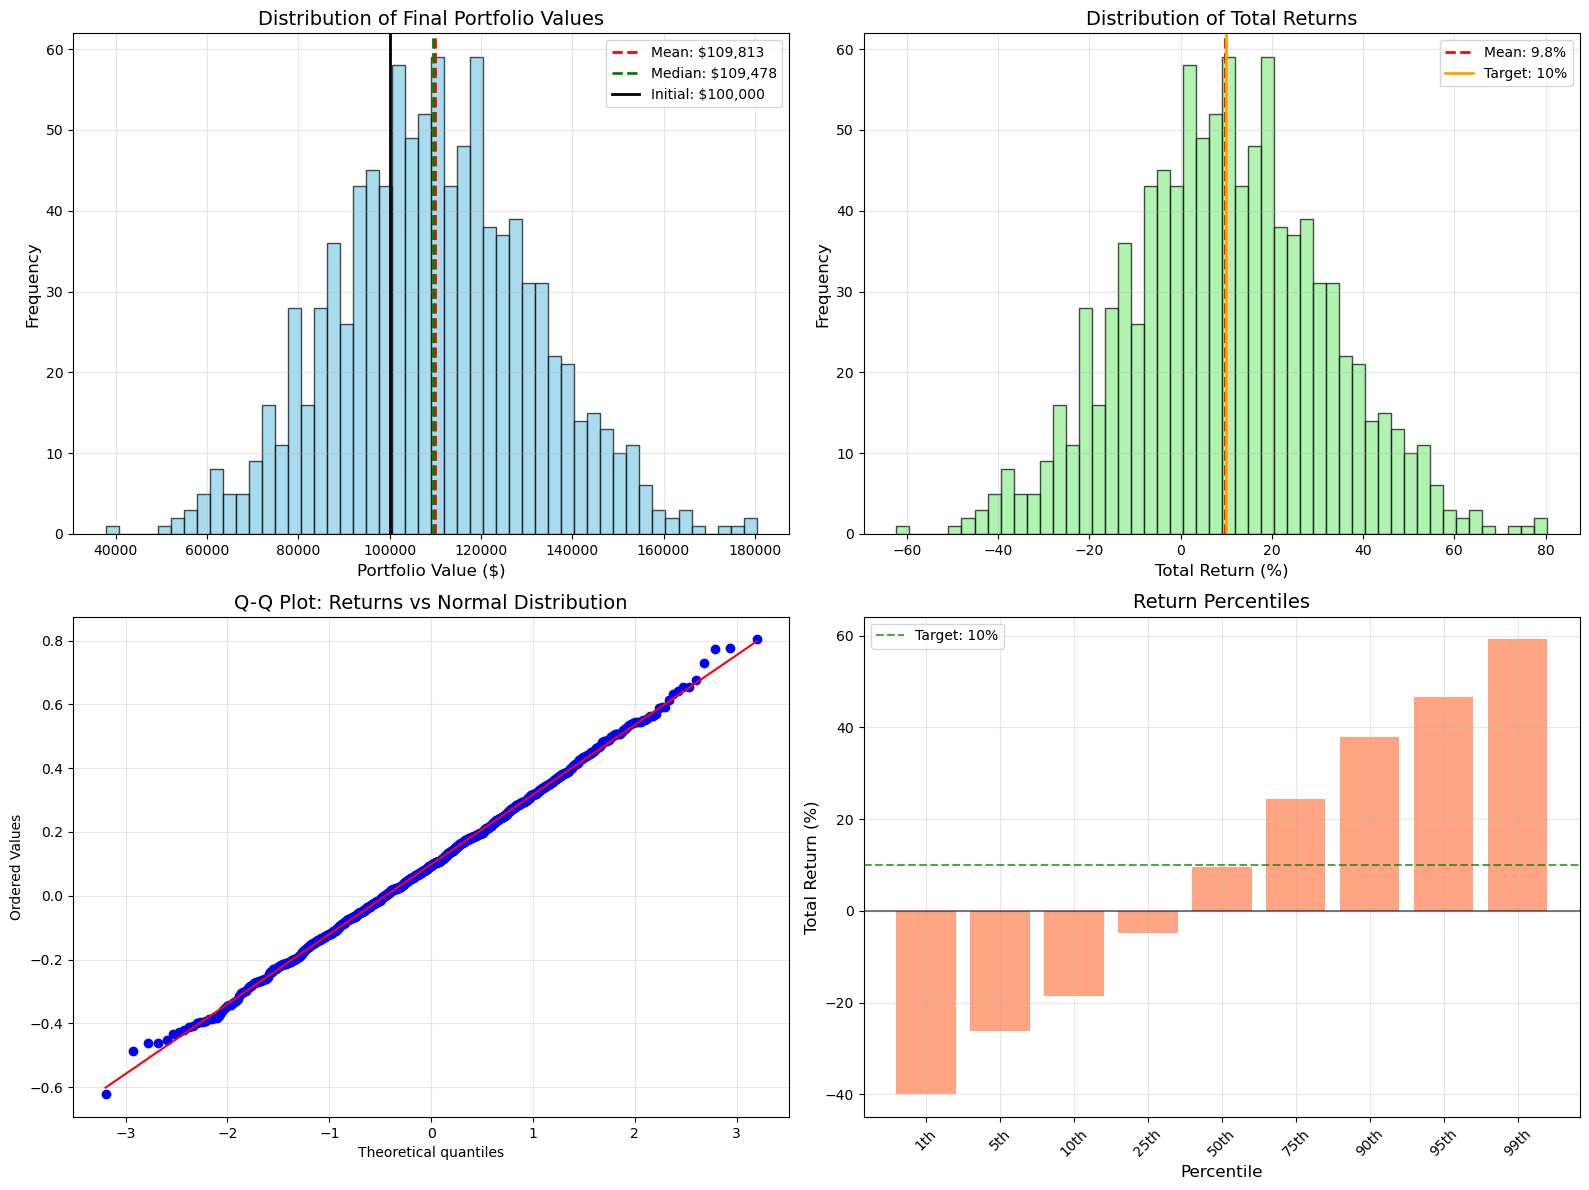


=== RISK METRICS ===
Value at Risk (95% confidence): $73,761.12 (Loss: $26,238.88)
Value at Risk (99% confidence): $59,983.81 (Loss: $40,016.19)
Conditional VaR (95%): $65,109.42 (Expected loss in worst 5% scenarios)

=== PROBABILITY ANALYSIS ===
Probability of Loss: 32.4%
Probability of achieving 10% return: 49.2%
Probability of doubling investment: 0.0%


In [20]:
# Distribution Analysis and Risk Metrics

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of Final Portfolio Values
axes[0, 0].hist(final_values, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(final_values.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${final_values.mean():,.0f}')
axes[0, 0].axvline(np.median(final_values), color='green', linestyle='--', linewidth=2, label=f'Median: ${np.median(final_values):,.0f}')
axes[0, 0].axvline(initial_investment, color='black', linestyle='-', linewidth=2, label=f'Initial: ${initial_investment:,.0f}')
axes[0, 0].set_title('Distribution of Final Portfolio Values', fontsize=14)
axes[0, 0].set_xlabel('Portfolio Value ($)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Returns Distribution
returns_final = (final_values - initial_investment) / initial_investment
axes[0, 1].hist(returns_final * 100, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].axvline(returns_final.mean() * 100, color='red', linestyle='--', linewidth=2, label=f'Mean: {returns_final.mean()*100:.1f}%')
axes[0, 1].axvline(desired_return * 100, color='orange', linestyle='-', linewidth=2, label=f'Target: {desired_return*100:.0f}%')
axes[0, 1].set_title('Distribution of Total Returns', fontsize=14)
axes[0, 1].set_xlabel('Total Return (%)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q Plot (Normal Distribution Test)
from scipy import stats
stats.probplot(returns_final, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: Returns vs Normal Distribution', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)

# 4. Risk Metrics Visualization
# Calculate percentiles
risk_percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
percentile_values = np.percentile(final_values, risk_percentiles)
percentile_returns = (percentile_values - initial_investment) / initial_investment * 100

axes[1, 1].bar(range(len(risk_percentiles)), percentile_returns, color='coral', alpha=0.7)
axes[1, 1].set_xticks(range(len(risk_percentiles)))
axes[1, 1].set_xticklabels([f'{p}th' for p in risk_percentiles], rotation=45)
axes[1, 1].axhline(0, color='black', linestyle='-', alpha=0.5)
axes[1, 1].axhline(desired_return * 100, color='green', linestyle='--', alpha=0.7, label=f'Target: {desired_return*100:.0f}%')
axes[1, 1].set_title('Return Percentiles', fontsize=14)
axes[1, 1].set_xlabel('Percentile', fontsize=12)
axes[1, 1].set_ylabel('Total Return (%)', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display risk metrics
var_95 = np.percentile(final_values, 5)  # Value at Risk (95% confidence)
var_99 = np.percentile(final_values, 1)  # Value at Risk (99% confidence)
cvar_95 = final_values[final_values <= var_95].mean()  # Conditional VaR (Expected Shortfall)

print(f"\n=== RISK METRICS ===")
print(f"Value at Risk (95% confidence): ${var_95:,.2f} (Loss: ${initial_investment - var_95:,.2f})")
print(f"Value at Risk (99% confidence): ${var_99:,.2f} (Loss: ${initial_investment - var_99:,.2f})")
print(f"Conditional VaR (95%): ${cvar_95:,.2f} (Expected loss in worst 5% scenarios)")
print(f"\n=== PROBABILITY ANALYSIS ===")
print(f"Probability of Loss: {(final_values < initial_investment).mean():.1%}")
print(f"Probability of achieving {desired_return*100:.0f}% return: {(returns_final >= desired_return).mean():.1%}")
print(f"Probability of doubling investment: {(final_values >= 2*initial_investment).mean():.1%}")

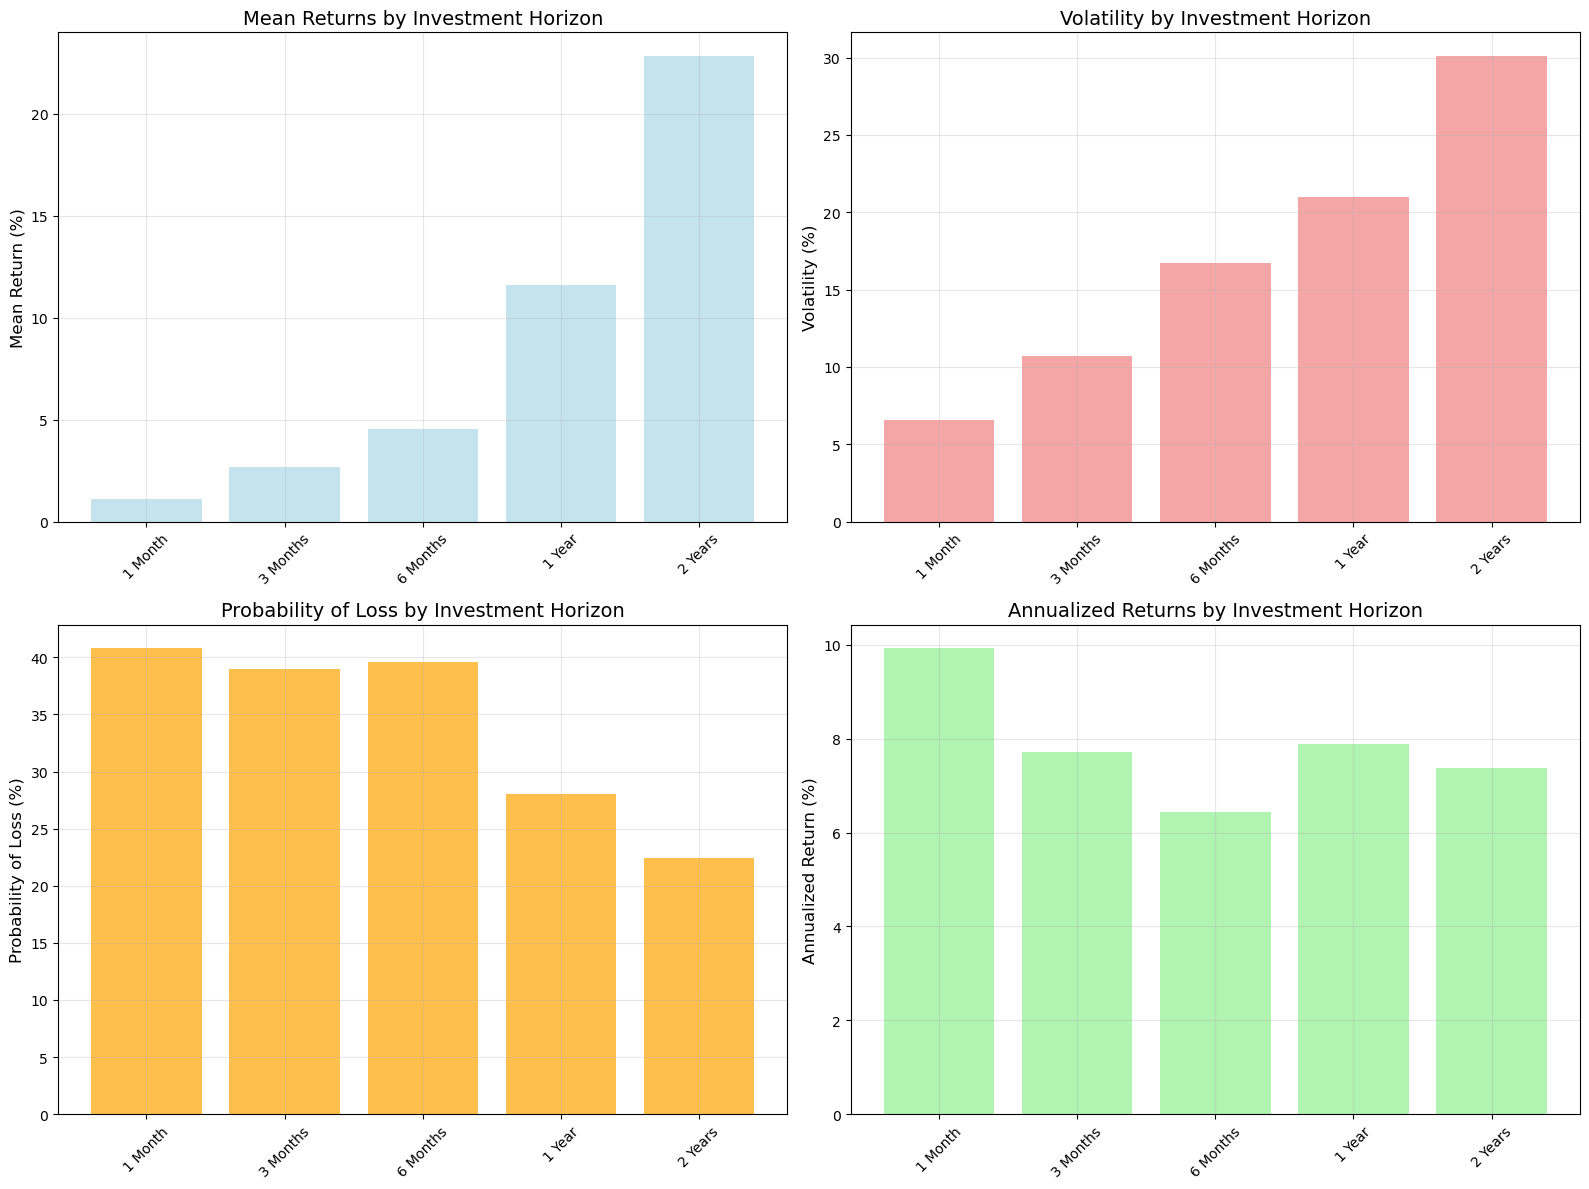

=== SENSITIVITY ANALYSIS: INVESTMENT HORIZON IMPACT ===
Horizon      Mean Return  Volatility   Prob Loss    VaR 95%      Ann. Return 
---------------------------------------------------------------------------
1 Month             1.1%        6.6%       40.8% $   90,612        9.9%
3 Months            2.7%       10.7%       39.0% $   84,511        7.7%
6 Months            4.6%       16.7%       39.6% $   78,414        6.4%
1 Year             11.6%       21.0%       28.0% $   79,792        7.9%
2 Years            22.9%       30.1%       22.4% $   73,492        7.4%


In [21]:
# Sensitivity Analysis: Impact of Investment Horizon

# Test different investment horizons
horizons = [30, 90, 180, 365, 730]  # Days
horizon_labels = ['1 Month', '3 Months', '6 Months', '1 Year', '2 Years']
num_sims_sensitivity = 500  # Reduced for faster computation

sensitivity_results = {}

for horizon, label in zip(horizons, horizon_labels):
    # Run simulations for each horizon
    sims = np.zeros((num_sims_sensitivity, horizon))
    
    for i in range(num_sims_sensitivity):
        random_returns = np.random.choice(returns_array, size=horizon, replace=True)
        cumulative_returns = random_returns.cumsum()
        sims[i, :] = initial_investment * (1 + cumulative_returns)
    
    # Store final values and calculate metrics
    final_vals = sims[:, -1]
    sensitivity_results[label] = {
        'final_values': final_vals,
        'mean_return': ((final_vals.mean() - initial_investment) / initial_investment),
        'volatility': final_vals.std() / initial_investment,
        'prob_loss': (final_vals < initial_investment).mean(),
        'var_95': np.percentile(final_vals, 5),
        'annualized_return': ((final_vals.mean() / initial_investment) ** (252/horizon)) - 1
    }

# Create visualization of sensitivity analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Mean Returns vs Horizon
mean_returns = [sensitivity_results[label]['mean_return'] * 100 for label in horizon_labels]
axes[0, 0].bar(horizon_labels, mean_returns, color='lightblue', alpha=0.7)
axes[0, 0].set_title('Mean Returns by Investment Horizon', fontsize=14)
axes[0, 0].set_ylabel('Mean Return (%)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. Volatility vs Horizon
volatilities = [sensitivity_results[label]['volatility'] * 100 for label in horizon_labels]
axes[0, 1].bar(horizon_labels, volatilities, color='lightcoral', alpha=0.7)
axes[0, 1].set_title('Volatility by Investment Horizon', fontsize=14)
axes[0, 1].set_ylabel('Volatility (%)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Probability of Loss vs Horizon
prob_losses = [sensitivity_results[label]['prob_loss'] * 100 for label in horizon_labels]
axes[1, 0].bar(horizon_labels, prob_losses, color='orange', alpha=0.7)
axes[1, 0].set_title('Probability of Loss by Investment Horizon', fontsize=14)
axes[1, 0].set_ylabel('Probability of Loss (%)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Annualized Returns vs Horizon
annualized_returns = [sensitivity_results[label]['annualized_return'] * 100 for label in horizon_labels]
axes[1, 1].bar(horizon_labels, annualized_returns, color='lightgreen', alpha=0.7)
axes[1, 1].set_title('Annualized Returns by Investment Horizon', fontsize=14)
axes[1, 1].set_ylabel('Annualized Return (%)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display sensitivity analysis summary
print("=== SENSITIVITY ANALYSIS: INVESTMENT HORIZON IMPACT ===")
print(f"{'Horizon':<12} {'Mean Return':<12} {'Volatility':<12} {'Prob Loss':<12} {'VaR 95%':<12} {'Ann. Return':<12}")
print("-" * 75)

for label in horizon_labels:
    results = sensitivity_results[label]
    print(f"{label:<12} {results['mean_return']*100:>10.1f}% {results['volatility']*100:>10.1f}% "
          f"{results['prob_loss']*100:>10.1f}% ${results['var_95']:>9,.0f} {results['annualized_return']*100:>10.1f}%")

## Key Insights & Investment Implications

### 📊 **Statistical Findings**
- **Return Distribution**: The simulation reveals the probability distribution of investment outcomes
- **Risk Quantification**: Value-at-Risk metrics provide concrete loss estimates for risk management
- **Time Diversification**: Longer investment horizons generally reduce the probability of losses

### 🎯 **Strategic Applications**
1. **Portfolio Allocation**: Use probability estimates to determine appropriate position sizing
2. **Risk Budgeting**: Allocate risk capital based on VaR and CVaR calculations
3. **Goal-Based Planning**: Assess likelihood of achieving specific return targets
4. **Stress Testing**: Prepare for worst-case scenarios using tail risk metrics

### ⚠️ **Model Limitations**
- **Historical Bias**: Assumes future markets behave like historical patterns
- **Independence Assumption**: Ignores serial correlation and volatility clustering
- **No Regime Changes**: Cannot account for structural market shifts
- **Transaction Costs**: Real-world costs would reduce actual returns

### 🔍 **Advanced Extensions**
- **Regime-Switching Models**: Account for bull/bear market cycles
- **GARCH Models**: Incorporate volatility clustering effects
- **Jump-Diffusion**: Model extreme market events and crashes
- **Multi-Asset**: Extend to portfolio-level simulations with correlations

### 💡 **Professional Usage**
This Monte Carlo framework forms the foundation for:
- **Asset Management**: Portfolio construction and risk management
- **Insurance**: Liability modeling and capital adequacy testing
- **Derivatives Pricing**: Option valuation and exotic product pricing
- **Regulatory Compliance**: Basel III capital requirements and stress testing

---
*Remember: Models are approximations of reality. Always combine quantitative analysis with qualitative judgment and market experience.*

=== INVESTMENT DECISION SUPPORT FRAMEWORK ===
Based on 1000 Monte Carlo simulations over 365 days

                     Metric                  Value
            Expected Return                  11.0%
          Volatility (Risk)                  22.1%
               Sharpe Ratio                   0.50
      Probability of Profit                  68.3%
Probability of Target (10%)                  50.9%
     Maximum Potential Loss                $46,636
               Risk Profile Moderate (Medium Risk)
         Investment Horizon  365 days (~1.4 years)
         Recommended Action                PROCEED

=== POSITION SIZING RECOMMENDATION ===
Maximum Loss Tolerance: 15%
Simulated 95% VaR Loss: 24.2%
Recommended Position Size: 62% of available capital
For $100,000 investment: Allocate $61,947

=== FINAL RECOMMENDATION ===
Investment Recommendation: STRONG BUY
Rationale: High expected return with acceptable risk
Confidence Level: Based on 1000 simulations using 39531 historical observation

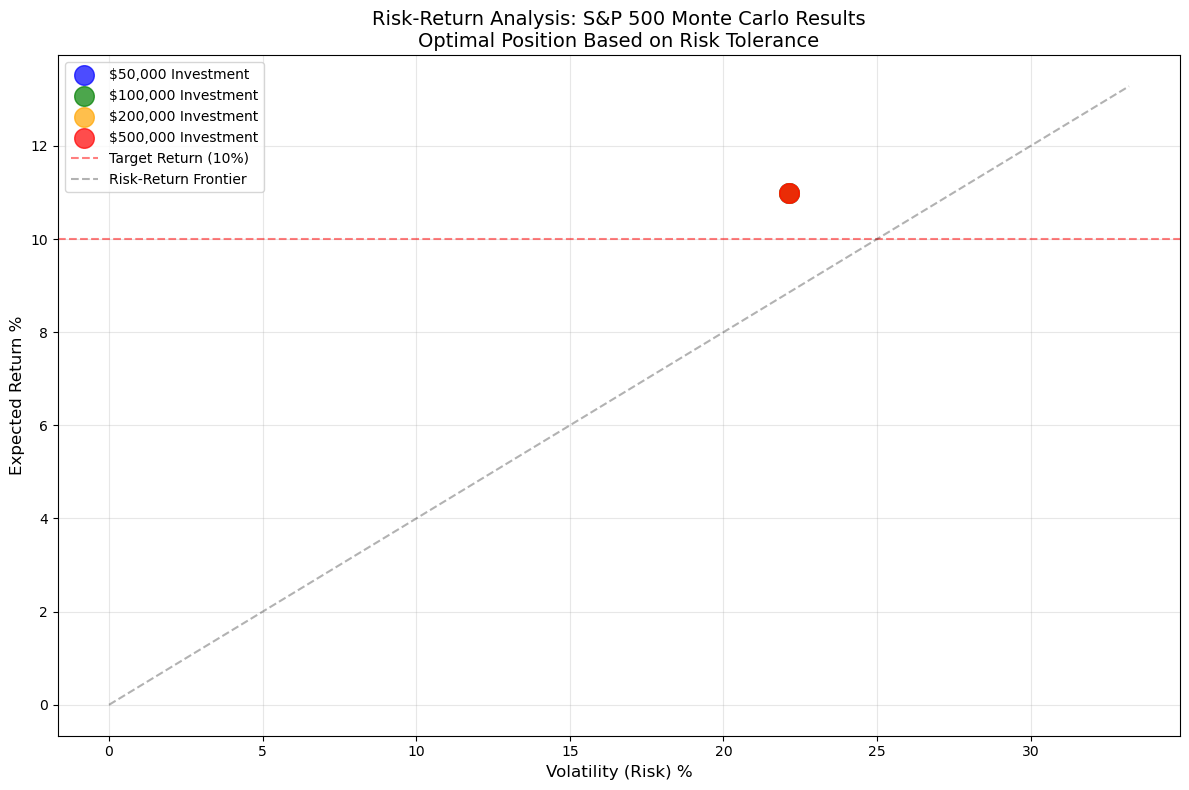


DISCLAIMER: This analysis is based on historical data simulation.
Past performance does not guarantee future results.
Consider consulting with a financial advisor before making investment decisions.


In [ ]:
# Practical Application: Investment Decision Framework

# Create a decision support table
print("=== INVESTMENT DECISION SUPPORT FRAMEWORK ===")
print(f"Based on {num_simulations} Monte Carlo simulations over {forecast_days} days\n")

# Calculate key decision metrics
final_values = simulations[:, -1]
returns_final = (final_values - initial_investment) / initial_investment

# Decision metrics
mean_return = returns_final.mean()
volatility = returns_final.std()
sharpe_ratio = mean_return / volatility if volatility > 0 else 0
prob_positive = (returns_final > 0).mean()
prob_target = (returns_final >= desired_return).mean()
downside_deviation = returns_final[returns_final < 0].std() if len(returns_final[returns_final < 0]) > 0 else 0

# Create recommendation framework
def get_risk_rating(prob_loss):
    if prob_loss < 0.20:
        return "Conservative", "Low Risk"
    elif prob_loss < 0.35:
        return "Moderate", "Medium Risk"
    else:
        return "Aggressive", "High Risk"

risk_profile, risk_level = get_risk_rating((final_values < initial_investment).mean())

# Investment summary table
summary_data = {
    'Metric': [
        'Expected Return',
        'Volatility (Risk)',
        'Sharpe Ratio',
        'Probability of Profit',
        'Probability of Target (10%)',
        'Maximum Potential Loss',
        'Risk Profile',
        'Investment Horizon',
        'Recommended Action'
    ],
    'Value': [
        f"{mean_return:.1%}",
        f"{volatility:.1%}",
        f"{sharpe_ratio:.2f}",
        f"{prob_positive:.1%}",
        f"{prob_target:.1%}",
        f"${initial_investment - final_values.min():,.0f}",
        f"{risk_profile} ({risk_level})",
        f"{forecast_days} days (~{forecast_days/252:.1f} years)",
        "PROCEED" if prob_positive > 0.6 and mean_return > 0.05 else "REVIEW STRATEGY"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Risk-adjusted position sizing recommendation
max_loss_tolerance = 0.15  # Maximum 15% portfolio loss tolerance
var_95_loss_pct = (initial_investment - np.percentile(final_values, 5)) / initial_investment
recommended_position_size = min(1.0, max_loss_tolerance / var_95_loss_pct) if var_95_loss_pct > 0 else 1.0

print(f"\n=== POSITION SIZING RECOMMENDATION ===")
print(f"Maximum Loss Tolerance: {max_loss_tolerance:.0%}")
print(f"Simulated 95% VaR Loss: {var_95_loss_pct:.1%}")
print(f"Recommended Position Size: {recommended_position_size:.0%} of available capital")
print(f"For ${initial_investment:,} investment: Allocate ${initial_investment * recommended_position_size:,.0f}")

# Final investment recommendation
print(f"\n=== FINAL RECOMMENDATION ===")
if mean_return > 0.08 and prob_positive > 0.65:
    recommendation = "STRONG BUY"
    reason = "High expected return with acceptable risk"
elif mean_return > 0.05 and prob_positive > 0.55:
    recommendation = "BUY"
    reason = "Positive expected return with moderate risk"
elif mean_return > 0 and prob_positive > 0.45:
    recommendation = "HOLD/CONSIDER"
    reason = "Marginal expected return, evaluate alternatives"
else:
    recommendation = "AVOID"
    reason = "Poor risk-adjusted returns"

print(f"Investment Recommendation: {recommendation}")
print(f"Rationale: {reason}")
print(f"Confidence Level: Based on {num_simulations} simulations using {len(returns_array)} historical observations")

# Create final visualization - Risk-Return Scatter
plt.figure(figsize=(12, 8))

# Scatter plot of return vs risk for different investment amounts
investment_amounts = [50000, 100000, 200000, 500000]
colors = ['blue', 'green', 'orange', 'red']

for amount, color in zip(investment_amounts, colors):
    # Scale simulations to different investment amounts
    scaled_returns = returns_final  # Returns are percentage-based, so scale-independent
    scaled_volatility = volatility  # Same for volatility
    
    plt.scatter(scaled_volatility * 100, scaled_returns.mean() * 100, 
               s=200, color=color, alpha=0.7, 
               label=f'${amount:,} Investment')

# Add target return line
plt.axhline(y=desired_return * 100, color='red', linestyle='--', alpha=0.5, label=f'Target Return ({desired_return:.0%})')

# Efficient frontier approximation (simplified)
risk_range = np.linspace(0, volatility * 150, 100)
return_range = risk_range * 0.4  # Simplified risk-return relationship

plt.plot(risk_range, return_range, 'k--', alpha=0.3, label='Risk-Return Frontier')

plt.xlabel('Volatility (Risk) %', fontsize=12)
plt.ylabel('Expected Return %', fontsize=12)
plt.title('Risk-Return Analysis: S&P 500 Monte Carlo Results\nOptimal Position Based on Risk Tolerance', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("DISCLAIMER: This analysis is based on historical data simulation.")
print("Past performance does not guarantee future results.")
print("Consider consulting with a financial advisor before making investment decisions.")
print(f"{'='*60}")